--------------------------
# Madrid and Barcelona AirBnB data investigation
--------------------------

- In this project I analyze consumer patterns for AirBnB listings in Madrid and Barcelona.

- I analyze the data and use serveral models to predict and find out:
  1. What moves users to choose from the wide range of rentals in offer?
  2. Do they look for the same things in different destinations?
  3. What city yields the most revenue?
  4. What are their revenue patterns?
 
------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

C:\Users\danie\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load Data

In [2]:
mad_calendar_data = pd.read_csv('data/madrid-airbnb-open-data/calendar.csv', header = 0, low_memory=False)
mad_listings_data = pd.read_csv('data/madrid-airbnb-open-data/listings.csv', header = 0, low_memory=False)
mad_reviews_data = pd.read_csv('data/madrid-airbnb-open-data/reviews.csv', header = 0, low_memory=False)

bar_calendar_data = pd.read_csv('data/barcelona-airbnb-open-data/calendar.csv', header = 0, low_memory=False)
bar_listings_data = pd.read_csv('data/barcelona-airbnb-open-data/listings.csv', header = 0, low_memory=False)
bar_reviews_data = pd.read_csv('data/barcelona-airbnb-open-data/reviews.csv', header = 0, low_memory=False)

### Understanding Data

In [3]:
mad_calendar_data.info()
mad_calendar_data[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6315595 entries, 0 to 6315594
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 192.7+ MB


,listing_id,date,available,price
0,102091,2019-08-13,t,$194.00
1,102091,2019-08-12,t,$194.00
2,102091,2019-08-11,t,$194.00
3,102091,2019-08-10,t,$275.00
4,102091,2019-08-09,t,$275.00


In [4]:
mad_calendar_data.info()
mad_calendar_data[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6315595 entries, 0 to 6315594
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 192.7+ MB


,listing_id,date,available,price
0,102091,2019-08-13,t,$194.00
1,102091,2019-08-12,t,$194.00
2,102091,2019-08-11,t,$194.00
3,102091,2019-08-10,t,$275.00
4,102091,2019-08-09,t,$275.00


In [5]:
bar_listings_data.info()
bar_listings_data[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18473 entries, 0 to 18472
Data columns (total 96 columns):
id                                  18473 non-null int64
listing_url                         18473 non-null object
scrape_id                           18473 non-null int64
last_scraped                        18473 non-null object
name                                18454 non-null object
summary                             17680 non-null object
space                               13256 non-null object
description                         18277 non-null object
experiences_offered                 18473 non-null object
neighborhood_overview               11638 non-null object
notes                               9045 non-null object
transit                             10879 non-null object
access                              10448 non-null object
interaction                         9932 non-null object
house_rules                         12438 non-null object
thumbnail_url            

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,18666,https://www.airbnb.com/rooms/18666,20181010054630,2018-10-10,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",none,Apartment in Barcelona near to the Plaza de la...,...,t,HUTB-003004,NaN,f,f,flexible,f,f,33,0.03
1,18674,https://www.airbnb.com/rooms/18674,20181010054630,2018-10-10,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,none,Apartment in Barcelona located in the heart of...,...,t,HUTB-002062,NaN,t,f,strict_14_with_grace_period,f,f,33,0.08
2,21605,https://www.airbnb.com/rooms/21605,20181010054630,2018-10-10,Nice and sunny duble room,"The flat is in Poblenou district, and the room...","L'apartament està al barri de Poblenou, i l'ha...","The flat is in Poblenou district, and the room...",none,Poblenou as one of the few areas that has grow...,...,t,NaN,NaN,f,f,moderate,f,f,3,3.22
3,25786,https://www.airbnb.com/rooms/25786,20181010054630,2018-10-10,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Room available for rent.- PEDRO PEREZ. Share...,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,none,Solo decir que a menudo ni salgo del barrio. M...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,t,t,1,2.13
4,31377,https://www.airbnb.com/rooms/31377,20181010054630,2018-10-10,"Room for 2, Sagrada Famili",The room in 500 m from Sagrada Familia. 3 bran...,"Great location, right next to Sagrada Familia,...",The room in 500 m from Sagrada Familia. 3 bran...,none,NaN,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.10


In [6]:
mad_reviews_data.info()
mad_reviews_data[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566108 entries, 0 to 566107
Data columns (total 6 columns):
listing_id       566108 non-null int64
id               566108 non-null int64
date             566108 non-null object
reviewer_id      566108 non-null int64
reviewer_name    566107 non-null object
comments         565451 non-null object
dtypes: int64(3), object(3)
memory usage: 25.9+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,19864,1241716,2012-05-07,746123,Rebecca,I had a really great stay in this apartment. ...
1,19864,1261674,2012-05-11,1666398,DeAnna,We had a lovely stay in Madrid at Ismael's pla...
2,19864,1316109,2012-05-21,1311350,Maud,"Very nice studio, at the center of Madrid, eve..."
3,19864,1350402,2012-05-26,2042228,Teresa,nuestra estadia en madrid fue buenisima ! y el...
4,19864,1496116,2012-06-17,257181,Alana,Ismael was an excellent host--very helpful and...


In [7]:
bar_reviews_data.info()
bar_reviews_data[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577646 entries, 0 to 577645
Data columns (total 6 columns):
listing_id       577646 non-null int64
id               577646 non-null int64
date             577646 non-null object
reviewer_id      577646 non-null int64
reviewer_name    577646 non-null object
comments         576892 non-null object
dtypes: int64(3), object(3)
memory usage: 26.4+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,18666,50158511,2015-10-10,1559265,Jody,Very nice flat. We had easy transportation to ...
1,18674,4808211,2013-05-27,4841196,Caron,"Great location. Clean, spacious flat. Would re..."
2,18674,10660311,2014-03-02,11600277,Juan Carlos,Mi mejor recomendación para este departamento....
3,18674,41087522,2015-08-04,35231385,Shlomi,"Big apartment, well equipped.\r\nVery good ser..."
4,18674,81000756,2016-06-20,23223644,Joost,The Check in was fast and flexible. The price ...



### Assessing the data
---------------------------------

The collected data can be differenciated in three different groups:

- reviews_data:

    - Review-specific to be excluded from "predictive" model.
    

- calendar_data:

    - Price and room availability seem like potential predictors, although we are only looking for the revenue.
    

- listings_data:

    - Potential predictors: Most of the data.


Lest's focus first on the listings' data for the purpose of finding what users look for and I'll end up analyzing the calendar and price data.

---------------------------------

### Prepare Data
---------------------------------


Trimming the dataset to ones that are going to be the most valuable. They can be grouped in five groups:

   - Descriptive: name, summary, space, description.
   
    
   - Host: host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost.
   

   - Listing details: property_type, room_type, accomodates, bathrooms, bedrooms, beds, bed_type, amenities.
   

   - Listing elements: price, cleaning_fee, extra_people, minimum_nights, maximum_nights, instant_bookable, cancellation policy.
   

   - Experiences: 'review_scores_rating', 'review_scores_accuracy', review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'.

---------------------------------

In [8]:
mad_ld = mad_listings_data.loc[:,['name', 'summary', 'space', 'description', 'host_response_time', 'host_response_rate', 
                          'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 
                          'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 
                          'cleaning_fee', 'minimum_nights', 'maximum_nights', 'instant_bookable','cancellation_policy',
                          'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                          'review_scores_communication', 'review_scores_location', 'review_scores_value']]

In [9]:
bar_ld = bar_listings_data.loc[:,['name', 'summary', 'space', 'description', 'host_response_time', 'host_response_rate', 
                          'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 
                          'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 
                          'cleaning_fee', 'minimum_nights', 'maximum_nights', 'instant_bookable','cancellation_policy',
                          'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                          'review_scores_communication', 'review_scores_location', 'review_scores_value']]

In [10]:
mad_ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17303 entries, 0 to 17302
Data columns (total 30 columns):
name                            17298 non-null object
summary                         16639 non-null object
space                           12578 non-null object
description                     17074 non-null object
host_response_time              11291 non-null object
host_response_rate              11291 non-null object
host_acceptance_rate            0 non-null float64
host_is_superhost               17299 non-null object
neighbourhood_group_cleansed    17303 non-null object
property_type                   17303 non-null object
room_type                       17303 non-null object
accommodates                    17303 non-null int64
bathrooms                       17276 non-null float64
bedrooms                        17292 non-null float64
beds                            17268 non-null float64
bed_type                        17303 non-null object
amenities                   

In [11]:
bar_ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18473 entries, 0 to 18472
Data columns (total 30 columns):
name                            18454 non-null object
summary                         17680 non-null object
space                           13256 non-null object
description                     18277 non-null object
host_response_time              12772 non-null object
host_response_rate              12772 non-null object
host_acceptance_rate            0 non-null float64
host_is_superhost               18468 non-null object
neighbourhood_group_cleansed    18473 non-null object
property_type                   18473 non-null object
room_type                       18473 non-null object
accommodates                    18473 non-null int64
bathrooms                       18461 non-null float64
bedrooms                        18462 non-null float64
beds                            18447 non-null float64
bed_type                        18473 non-null object
amenities                   

### Clean Data and explanation for N/A filling

---------------------------------

- Get lenghts of descriptive variables and drop original description variables. **N/A values in 'name_length', 'summary_length', 'space_length' and 'description_length' are filledd with 0 since it means there is nothing in them.**

- Recode host_response_time to integers since for easy handling and **fill missing values using forward-fill method since they don't seem to be too critic.**

- Convert acceptance/response percentages to numbers and **fill missing values using forward-fill method method since they don't seem to be too critic.**

- Change boolean to binary.

- Trim property_type category to 5 categories.

- Change bed_type to binary real bed or other.

- Convert cleaning fee and price from strings to float and **fill missing values with 0 for no cleaning fee because, obviously, if there is no cleaning fee it means that there is no cost to it. ie 0.**

- bathrooms, bedrooms, beds and host_is_superhost are **filled with na since we cannot be sure what a missing value represents.**

---------------------------------

In [12]:
mad_ld.loc[:,'name_length'] = mad_ld['name'].str.len()
mad_ld.loc[:,'summary_length'] = mad_ld['summary'].str.len()
mad_ld.loc[:,'space_length'] = mad_ld['space'].str.len()
mad_ld.loc[:,'description_length'] = mad_ld['description'].str.len()
mad_ld.loc[:,'amenities_length'] = mad_ld['amenities'].str.len()
mad_ld.loc[:,'name_length'].fillna(0, inplace=True)
mad_ld.loc[:,'summary_length'].fillna(0, inplace=True)
mad_ld.loc[:,'space_length'].fillna(0, inplace=True)
mad_ld.loc[:,'description_length'].fillna(0, inplace=True)
mad_ld.loc[:,'amenities_length'] = mad_ld['amenities'].str.len()
mad_ld = mad_ld.drop(['name', 'summary', 'space', 'description', 'amenities'], 1)

In [13]:
mad_ld['host_response_time'].replace('within an hour', 1, inplace=True)
mad_ld['host_response_time'].replace('within a few hours', 2, inplace=True)
mad_ld['host_response_time'].replace('within a day', 3, inplace=True)
mad_ld['host_response_time'].replace('a few days or more', 4, inplace=True)
mad_ld['host_response_time'].fillna(method='ffill', inplace=True)

In [14]:
mad_ld['host_acceptance_rate'] = mad_ld['host_acceptance_rate'].replace('%','',regex=True).astype('float64')/100.00
mad_ld['host_response_rate'] = mad_ld['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00
mad_ld['host_response_rate'].fillna(method='ffill', inplace=True)
mad_ld['host_acceptance_rate'].fillna(method='ffill', inplace=True)

In [15]:
mad_ld['host_is_superhost'].replace('t',1, inplace=True)
mad_ld['host_is_superhost'].replace('f',0, inplace=True)
mad_ld['instant_bookable'].replace('t',1, inplace=True)
mad_ld['instant_bookable'].replace('f',0, inplace=True)

In [16]:
bar_ld.loc[:,'name_length'] = bar_ld['name'].str.len()
bar_ld.loc[:,'summary_length'] = bar_ld['summary'].str.len()
bar_ld.loc[:,'space_length'] = bar_ld['space'].str.len()
bar_ld.loc[:,'description_length'] = bar_ld['description'].str.len()
bar_ld.loc[:,'amenities_length'] = bar_ld['amenities'].str.len()
bar_ld.loc[:,'name_length'].fillna(0, inplace=True)
bar_ld.loc[:,'summary_length'].fillna(0, inplace=True)
bar_ld.loc[:,'space_length'].fillna(0, inplace=True)
bar_ld.loc[:,'description_length'].fillna(0, inplace=True)
bar_ld.loc[:,'amenities_length'] = bar_ld['amenities'].str.len()
bar_ld = bar_ld.drop(['name', 'summary', 'space', 'description', 'amenities'], 1)

In [17]:
bar_ld['host_response_time'].replace('within an hour', 1, inplace=True)
bar_ld['host_response_time'].replace('within a few hours', 2, inplace=True)
bar_ld['host_response_time'].replace('within a day', 3, inplace=True)
bar_ld['host_response_time'].replace('a few days or more', 4, inplace=True)
bar_ld['host_response_time'].fillna(method='ffill', inplace=True)

In [18]:
bar_ld['host_acceptance_rate'] = bar_ld['host_acceptance_rate'].replace('%','',regex=True).astype('float64')/100.00
bar_ld['host_response_rate'] = bar_ld['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00
bar_ld['host_response_rate'].fillna(method='ffill', inplace=True)
bar_ld['host_acceptance_rate'].fillna(method='ffill', inplace=True)

In [19]:
bar_ld['host_is_superhost'].replace('t',1, inplace=True)
bar_ld['host_is_superhost'].replace('f',0, inplace=True)
bar_ld['instant_bookable'].replace('t',1, inplace=True)
bar_ld['instant_bookable'].replace('f',0, inplace=True)

In [20]:
#Clean property_type category to 5 categories (this is commented because previous reviewer thought it wasn't clear enough...)

def recode(value):
    if value not in ['House', 'Apartment', 'Townhouse', 'Condominium']:
        return 'Other'
    return value

In [23]:
#Clean bed_type to binary real bed or other (this is commented because previous reviewer thought it wasn't clear enough...)

def recode(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

In [21]:
mad_ld['property_type'] = mad_ld['property_type'].apply(recode)

In [22]:
bar_ld['property_type'] = bar_ld['property_type'].apply(recode)

In [24]:
mad_ld['bed_type'] = mad_ld['bed_type'].apply(recode)

In [25]:
bar_ld['bed_type'] = bar_ld['bed_type'].apply(recode)

In [26]:
mad_ld['price'] = mad_ld['price'].str.replace('$', '')
mad_ld['price'] = mad_ld['price'].str.replace(',', '').astype('float64')
mad_ld['cleaning_fee'] = mad_ld['cleaning_fee'].str.replace('$', '')
mad_ld['cleaning_fee'] = mad_ld['cleaning_fee'].str.replace(',', '').astype('float64')

In [27]:
bar_ld['price'] = bar_ld['price'].str.replace('$', '')
bar_ld['price'] = bar_ld['price'].str.replace(',', '').astype('float64')
bar_ld['cleaning_fee'] = bar_ld['cleaning_fee'].str.replace('$', '')
bar_ld['cleaning_fee'] = bar_ld['cleaning_fee'].str.replace(',', '').astype('float64')

In [28]:
mad_ld['cleaning_fee'].fillna(0, inplace=True)
mad_ld['bathrooms'].fillna(method='ffill', inplace=True)
mad_ld['bedrooms'].fillna(method='ffill', inplace=True)
mad_ld['beds'].fillna(method='ffill', inplace=True)
mad_ld['host_is_superhost'].fillna(method='ffill', inplace=True)

In [29]:
bar_ld['cleaning_fee'].fillna(0, inplace=True)
bar_ld['bathrooms'].fillna(method='ffill', inplace=True)
bar_ld['bedrooms'].fillna(method='ffill', inplace=True)
bar_ld['beds'].fillna(method='ffill', inplace=True)
bar_ld['host_is_superhost'].fillna(method='ffill', inplace=True)

In [30]:
mad_ld = mad_ld[mad_ld['review_scores_rating'].isnull() == 0]

In [31]:
bar_ld = bar_ld[bar_ld['review_scores_rating'].isnull() == 0]

In [32]:
mad_ld = mad_ld.drop(['host_acceptance_rate'], axis=1)

In [33]:
bar_ld = bar_ld.drop(['host_acceptance_rate'], axis=1)

In [34]:
mad_ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14187 entries, 0 to 17201
Data columns (total 29 columns):
host_response_time              14187 non-null float64
host_response_rate              14187 non-null float64
host_is_superhost               14187 non-null float64
neighbourhood_group_cleansed    14187 non-null object
property_type                   14187 non-null object
room_type                       14187 non-null object
accommodates                    14187 non-null int64
bathrooms                       14187 non-null float64
bedrooms                        14187 non-null float64
beds                            14187 non-null float64
bed_type                        14187 non-null object
price                           14187 non-null float64
cleaning_fee                    14187 non-null float64
minimum_nights                  14187 non-null int64
maximum_nights                  14187 non-null int64
instant_bookable                14187 non-null int64
cancellation_policy    

In [35]:
bar_ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14711 entries, 0 to 18372
Data columns (total 29 columns):
host_response_time              14711 non-null float64
host_response_rate              14711 non-null float64
host_is_superhost               14711 non-null float64
neighbourhood_group_cleansed    14711 non-null object
property_type                   14711 non-null object
room_type                       14711 non-null object
accommodates                    14711 non-null int64
bathrooms                       14711 non-null float64
bedrooms                        14711 non-null float64
beds                            14711 non-null float64
bed_type                        14711 non-null object
price                           14711 non-null float64
cleaning_fee                    14711 non-null float64
minimum_nights                  14711 non-null int64
maximum_nights                  14711 non-null int64
instant_bookable                14711 non-null int64
cancellation_policy    

### Data Modeling

##### Distributions

In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

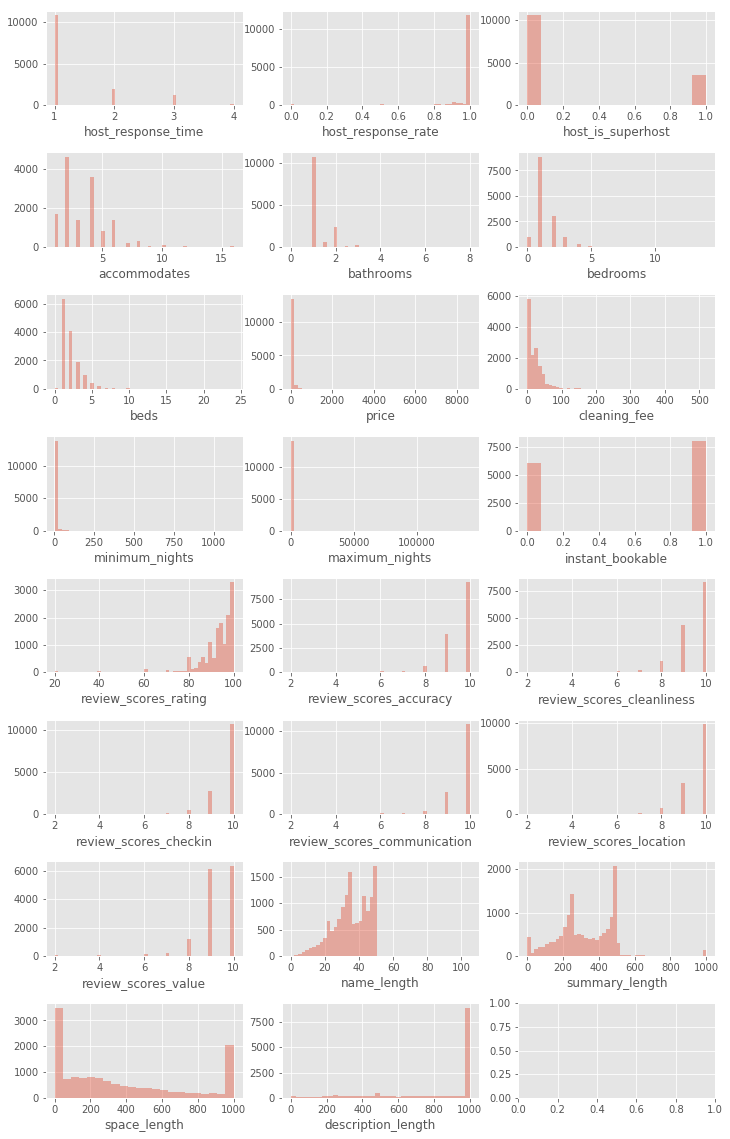

In [37]:
mad_numdf = mad_ld.select_dtypes(include=numerics)
mad_numdf = mad_numdf.dropna(axis=0, how='any')
mad_numdf_variables = list(mad_numdf)

mad_graphs = len(mad_numdf_variables)-1

# Create a list of positions for the chart (this is commented because previous reviewer thought it wasn't clear enough...)

mad_position = []
for i in range(8):
    for j in range(3):
        b = i,j
        mad_position.append(b)

fig, axes = plt.subplots(nrows=8, ncols=3, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

# Fill positions in chart with graphs (this is commented because previous reviewer thought it wasn't clear enough...)

for i in range(mad_graphs):
    sns.distplot(mad_numdf[mad_numdf_variables[i]], ax=axes[mad_position[i]], kde=False)
    
fig.savefig('images/madrid_ditributions.png')

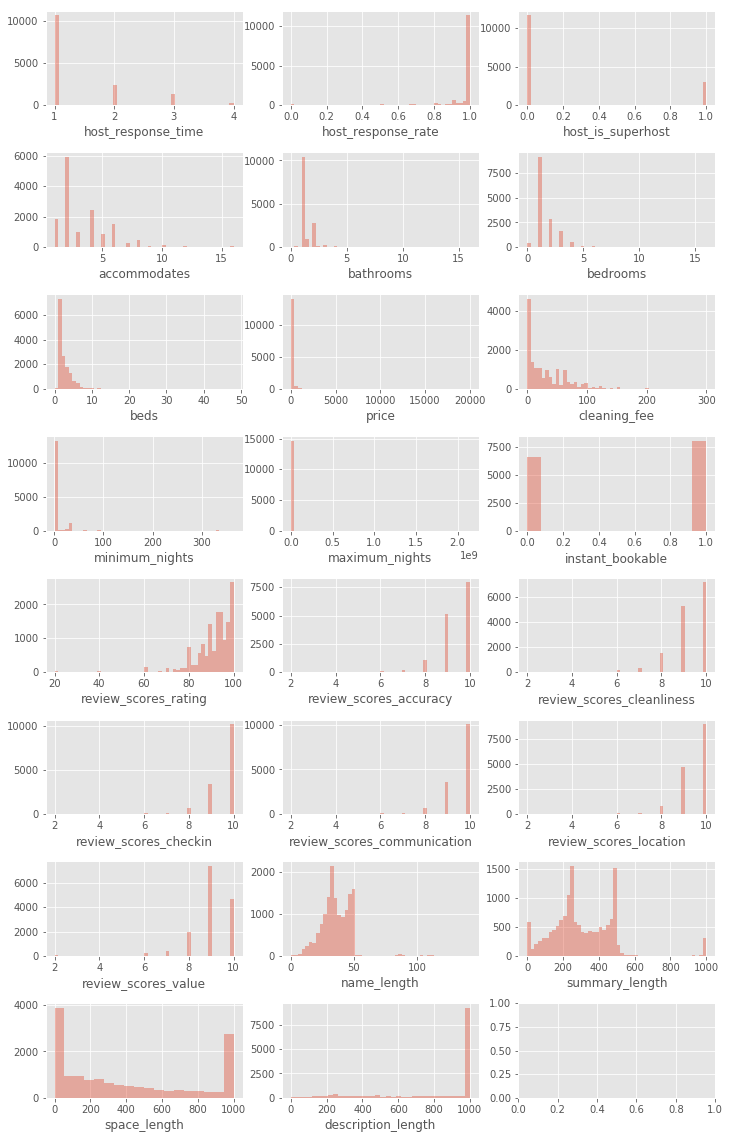

In [38]:
bar_numdf = bar_ld.select_dtypes(include=numerics)
bar_numdf = bar_numdf.dropna(axis=0, how='any')
bar_numdf_variables = list(bar_numdf)

bar_graphs = len(bar_numdf_variables)-1

# Create a list of positions for the chart (this is commented because previous reviewer thought it wasn't clear enough...)

bar_position = []
for i in range(8):
    for j in range(3):
        b = i,j
        bar_position.append(b)

fig, axes = plt.subplots(nrows=8, ncols=3, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

# Fill positions in chart with graphs (this is commented because previous reviewer thought it wasn't clear enough...)

for i in range(bar_graphs):
    sns.distplot(bar_numdf[bar_numdf_variables[i]], ax=axes[bar_position[i]], kde=False)
    
fig.savefig('images/barcelona_ditributions.png')

##### Correlation matrices

review_scores_rating           1.000000
review_scores_value            0.798566
review_scores_accuracy         0.779162
review_scores_cleanliness      0.705932
review_scores_communication    0.666187
review_scores_checkin          0.628580
review_scores_location         0.408552
host_is_superhost              0.283191
amenities_length               0.160993
name_length                    0.080125
description_length             0.070799
host_response_rate             0.036009
summary_length                 0.034486
bathrooms                      0.025636
space_length                   0.025168
bedrooms                       0.022531
cleaning_fee                   0.018790
price                          0.004343
host_response_time            -0.000856
maximum_nights                -0.001584
minimum_nights                -0.003236
beds                          -0.037201
accommodates                  -0.038836
instant_bookable              -0.077400
Name: review_scores_rating, dtype: float

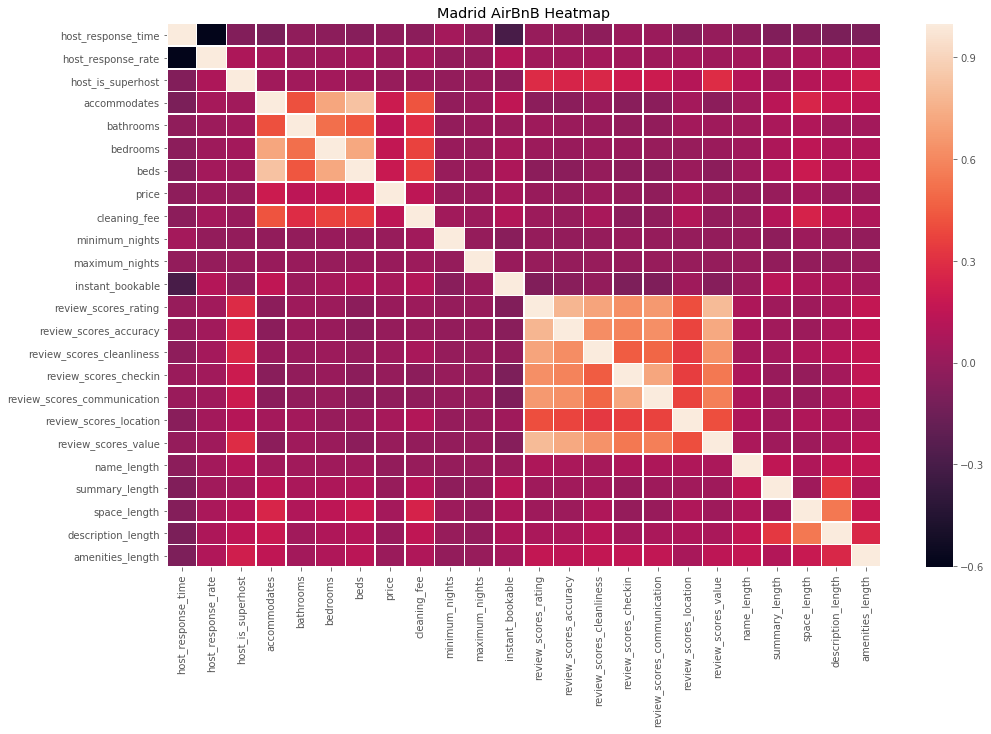

In [39]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Madrid AirBnB Heatmap')
mad_corr = mad_ld.corr()
mad_corr = (mad_corr)
sns.heatmap(mad_corr, 
            xticklabels=mad_corr.columns.values,
            yticklabels=mad_corr.columns.values, linewidths=.5, ax=ax)
mad_corr['review_scores_rating'].sort_values(ascending=False)

In [40]:
fig.savefig('images/madrid_heatmap.png')

review_scores_rating           1.000000
review_scores_value            0.788952
review_scores_accuracy         0.775786
review_scores_cleanliness      0.714284
review_scores_communication    0.685066
review_scores_checkin          0.642065
review_scores_location         0.478179
host_is_superhost              0.293166
amenities_length               0.138017
name_length                    0.052011
description_length             0.049391
host_response_rate             0.043921
summary_length                 0.017856
host_response_time             0.005050
space_length                   0.004559
maximum_nights                 0.003019
minimum_nights                -0.001111
price                         -0.018240
bathrooms                     -0.038185
bedrooms                      -0.050901
cleaning_fee                  -0.058208
instant_bookable              -0.094834
beds                          -0.097826
accommodates                  -0.098582
Name: review_scores_rating, dtype: float

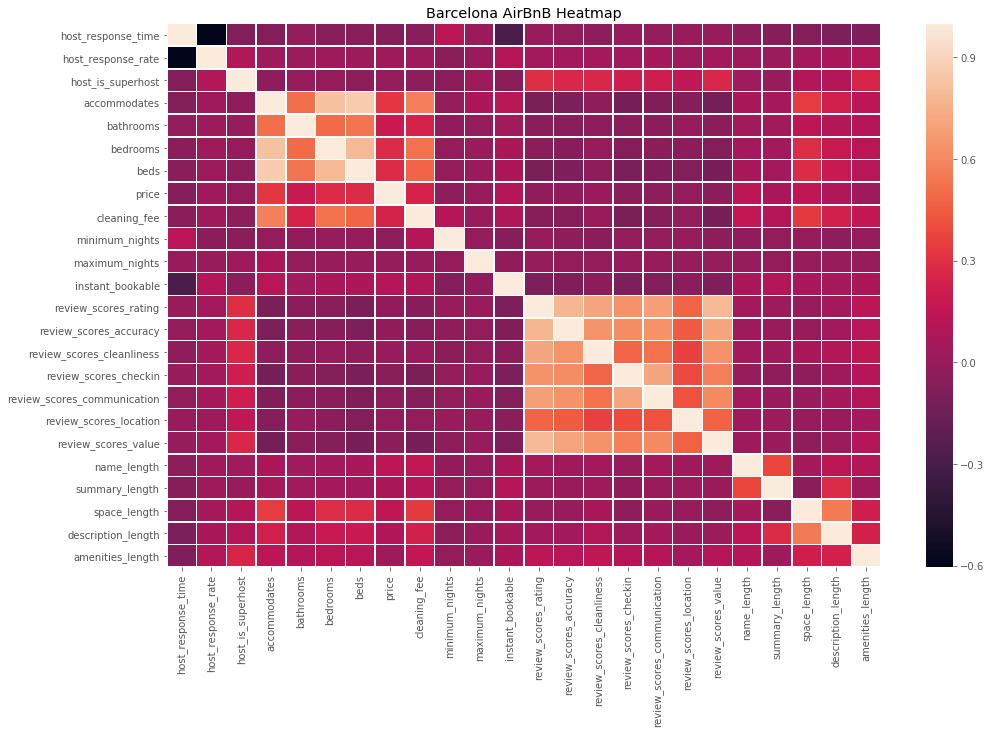

In [41]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Barcelona AirBnB Heatmap')
bar_corr = bar_ld.corr()
bar_corr = (bar_corr)
sns.heatmap(bar_corr, 
            xticklabels=bar_corr.columns.values,
            yticklabels=bar_corr.columns.values, linewidths=.5, ax=ax)
bar_corr['review_scores_rating'].sort_values(ascending=False)

In [42]:
fig.savefig('images/barcelona_heatmap.png')

### Madrid Prediction Models

In [43]:
mad_model_data = mad_ld.loc[:,('host_response_time', 'host_response_rate', 'host_is_superhost', 'neighbourhood_group_cleansed',
                               'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
                               'price', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'instant_bookable', 
                               'cancellation_policy', 'review_scores_rating', 'name_length', 'summary_length', 'space_length',
                               'description_length', 'amenities_length')]

In [44]:
mad_model_data = pd.get_dummies(mad_model_data, columns=['neighbourhood_group_cleansed', 'property_type', 'room_type', 
                                                         'bed_type', 'cancellation_policy'])

In [45]:
target_name = 'review_scores_rating'
X = mad_model_data.drop('review_scores_rating', axis=1)
y = mad_model_data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=243)

##### OLS Regression

In [46]:
Xr = X_train
yr = y_train
Xr = sm.add_constant(Xr)
ols_model = sm.OLS(yr, Xr).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.120
Model:                              OLS   Adj. R-squared:                  0.117
Method:                   Least Squares   F-statistic:                     34.12
Date:                  Wed, 14 Nov 2018   Prob (F-statistic):          8.68e-291
Time:                          17:16:17   Log-Likelihood:                -42288.
No. Observations:                 12058   AIC:                         8.467e+04
Df Residuals:                     12009   BIC:                         8.504e+04
Df Model:                            48                                         
Covariance Type:              nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 38.2375      0.545     70.179      0.000      37.170      39.306
host_response_time                                     0.1403      0.142      0.989      0.323      -0.138       0.419
host_response_rate                                     1.3400      0.753      1.780      0.075      -0.135       2.815
host_is_superhost                                      4.7993      0.176     27.215      0.000       4.454       5.145
accommodates                                          -0.3974      0.082     -4.836      0.000      -0.558      -0.236
bathrooms                                              0.3817      0.165      2.317      0.021       0.059       0.705
bedrooms                                               0.8443      0.142      5.932      0.000       0.565       1.123
beds                                                  -0.3069      0.099     -3.090      0.002      -0.502      -0.112
price                                                  0.0008      0.000      1.573      0.116      -0.000       0.002
cleaning_fee                                           0.0126      0.003      4.141      0.000       0.007       0.019
minimum_nights                                        -0.0016      0.004     -0.372      0.710      -0.010       0.007
maximum_nights                                     -6.594e-06   3.18e-05     -0.207      0.836   -6.89e-05    5.57e-05
instant_bookable                                      -1.1689      0.161     -7.253      0.000      -1.485      -0.853
name_length                                            0.0274      0.007      3.840      0.000       0.013       0.041
summary_length                                         0.0007      0.001      1.330      0.184      -0.000       0.002
space_length                                       -9.946e-05      0.000     -0.371      0.710      -0.001       0.000
description_length                                     0.0005      0.000      1.469      0.142      -0.000       0.001
amenities_length                                       0.0051      0.000     11.763      0.000       0.004       0.006
neighbourhood_group_cleansed_Arganzuela                1.6125      0.338      4.777      0.000       0.951       2.274
neighbourhood_group_cleansed_Barajas                   2.1010      0.885      2.374      0.018       0.367       3.835
neighbourhood_group_cleansed_Carabanchel               1.1321      0.453      2.502      0.012       0.245       2.019
neighbourhood_group_cleansed_Centro                    1.5690      0.198      7.912      0.000       1.180       1.958
neighbourhood_group_cleansed_Chamartín                 1.7057      0.465      3.664   

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
ols_coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
ols_coefficients.sort_values('importance', ascending=False)[:10]

,feature,importance
2,host_is_superhost,4.799301
35,neighbourhood_group_cleansed_Vicálvaro,3.332252
52,cancellation_policy_super_strict_60,2.904600
28,neighbourhood_group_cleansed_Moratalaz,2.228608
25,neighbourhood_group_cleansed_Hortaleza,1.482006
1,host_response_rate,1.339951
36,neighbourhood_group_cleansed_Villa de Vallecas,1.233453
44,room_type_Private room,1.098334
5,bedrooms,0.844319
43,room_type_Entire home/apt,0.790052


In [49]:
ols_y_predict = lm.predict(X_test)
ols_mse = np.sqrt(metrics.mean_squared_error(y_test, ols_y_predict))
ols_mse

8.214905461126328

##### Decision Tree

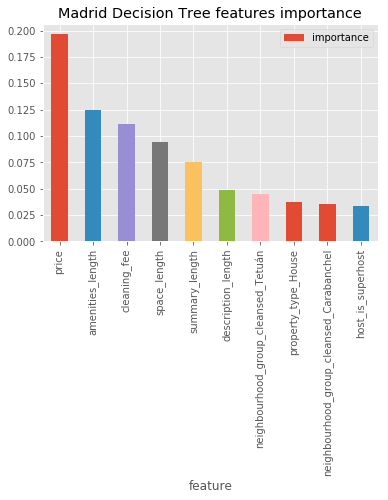

In [50]:
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
dtree = dtree.fit(X_train,y_train)

importances = dtree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',
                                                                   title='Madrid Decision Tree features importance')

In [51]:
dtree_y_predict = dtree.predict(X_test)
dtree_mse = np.sqrt(metrics.mean_squared_error(y_test, dtree_y_predict))
dtree_mse

24.67569835371993

##### Random Forest

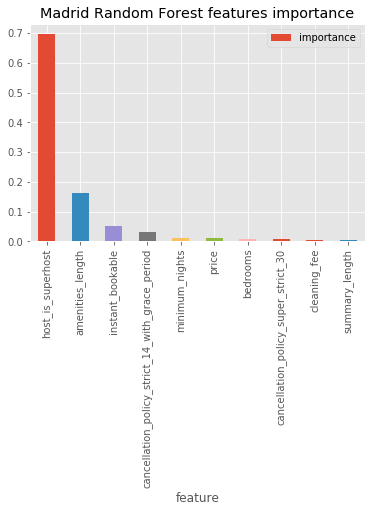

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3, random_state=0)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',
                                                                 title='Madrid Random Forest features importance')

In [53]:
rf_y_predict = rf.predict(X_test)
rf_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_y_predict))
rf_mse

8.25706733965487

In [54]:
mean_array = [y_train.mean()] * len(X_test)
mean_mse = np.sqrt(metrics.mean_squared_error(y_test, mean_array))
median_array = [y_train.median()] * len(X_test)
median_mse = np.sqrt(metrics.mean_squared_error(y_test, mean_array))

In [55]:
print("Random Forest MSE:", rf_mse)
print("Decision Tree MSE:", dtree_mse)
print("OLS MSE",ols_mse)
print("Median MSE",median_mse)
print("Mean MSE",mean_mse)

Random Forest MSE: 8.25706733965487
Decision Tree MSE: 24.67569835371993
OLS MSE 8.214905461126328
Median MSE 8.73601319649228
Mean MSE 8.73601319649228


-----------------------
It seems that in order to have a good rating you should be a supehost and have many ammenities in your listing, but what happens if I restrict the Random Forest model to the top 10 predictors?

-----------------------

In [56]:
rf_10_features = rf_result.sort_values(by='importance', ascending=False)['feature'][:10].tolist()
rf_10_features_model = rf.fit(X_train[rf_10_features], y_train)
rf_10_features_model_predict=rf_10_features_model.predict(X_test[rf_10_features])
rf_10_features_model_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_10_features_model_predict))
print(rf_10_features_model_mse)

8.25563741691751


In [57]:
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)
rfe_result = pd.DataFrame({'feature': feat_names, 'ranking': rfe.ranking_, 'selection': rfe.support_})
rfe_result.sort_values(by='ranking')[:10]

,feature,ranking,selection
0,host_response_time,1,True
43,room_type_Entire home/apt,1,True
44,room_type_Private room,1,True
9,minimum_nights,1,True
47,bed_type_Real Bed,1,True
49,cancellation_policy_moderate,1,True
46,bed_type_Other,1,True
4,bathrooms,1,True
2,host_is_superhost,1,True
1,host_response_rate,1,True


In [58]:
rf_10_features = rfe_result.sort_values(by='ranking')['feature'][:10].tolist()
rf_10_features_model = rf.fit(X_train[rf_10_features], y_train)
rf_10_features_model_predict=rf_10_features_model.predict(X_test[rf_10_features])
rf_10_features_model_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_10_features_model_predict))
print(rf_10_features_model_mse)

8.340059096446387


In [59]:
model = LinearRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)
rfe_result = pd.DataFrame({'feature': feat_names, 'ranking': rfe.ranking_, 'selection': rfe.support_})
rfe_result.sort_values(by='ranking')[:10]

,feature,ranking,selection
52,cancellation_policy_super_strict_60,1,True
2,host_is_superhost,1,True
50,cancellation_policy_strict_14_with_grace_period,1,True
45,room_type_Shared room,1,True
44,room_type_Private room,1,True
43,room_type_Entire home/apt,1,True
37,neighbourhood_group_cleansed_Villaverde,1,True
35,neighbourhood_group_cleansed_Vicálvaro,1,True
28,neighbourhood_group_cleansed_Moratalaz,1,True
25,neighbourhood_group_cleansed_Hortaleza,1,True


In [60]:
rf_10_features = rfe_result.sort_values(by='ranking')['feature'][:10].tolist()
rf_10_features_model = rf.fit(X_train[rf_10_features], y_train)
rf_10_features_model_predict=rf_10_features_model.predict(X_test[rf_10_features])
rf_10_features_model_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_10_features_model_predict))
print(rf_10_features_model_mse)

8.354686568794106


-----------------

Short anwer is... nothing new.

-----------------

### Barcelona Prediction Models

In [61]:
bar_model_data = bar_ld.loc[:,('host_response_time', 'host_response_rate', 'host_is_superhost', 'neighbourhood_group_cleansed',
                               'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
                               'price', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'instant_bookable', 
                               'cancellation_policy', 'review_scores_rating', 'name_length', 'summary_length', 'space_length',
                               'description_length', 'amenities_length')]

In [62]:
bar_model_data = pd.get_dummies(bar_model_data, columns=['neighbourhood_group_cleansed', 'property_type', 'room_type', 
                                                         'bed_type', 'cancellation_policy'])

##### OLS Regression

In [63]:
target_name = 'review_scores_rating'
X = bar_model_data.drop('review_scores_rating', axis=1)
y = bar_model_data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=243)

In [64]:
Xr = X_train
yr = y_train
Xr = sm.add_constant(Xr)
ols_model = sm.OLS(yr, Xr).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.121
Model:                              OLS   Adj. R-squared:                  0.119
Method:                   Least Squares   F-statistic:                     45.28
Date:                  Wed, 14 Nov 2018   Prob (F-statistic):          1.06e-314
Time:                          17:29:22   Log-Likelihood:                -44663.
No. Observations:                 12504   AIC:                         8.940e+04
Df Residuals:                     12465   BIC:                         8.969e+04
Df Model:                            38                                         
Covariance Type:              nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               37.0220      0.877     42.229      0.000      35.304      38.740
host_response_time                                   0.3535      0.141      2.502      0.012       0.077       0.630
host_response_rate                                   1.9423      0.770      2.521      0.012       0.432       3.452
host_is_superhost                                    6.0739      0.202     30.044      0.000       5.678       6.470
accommodates                                        -0.2480      0.089     -2.771      0.006      -0.423      -0.073
bathrooms                                            0.0121      0.157      0.077      0.939      -0.296       0.320
bedrooms                                             0.7191      0.149      4.840      0.000       0.428       1.010
beds                                                -0.4507      0.084     -5.393      0.000      -0.615      -0.287
price                                                0.0006      0.000      1.656      0.098      -0.000       0.001
cleaning_fee                                         0.0006      0.003      0.191      0.849      -0.005       0.007
minimum_nights                                       0.0102      0.005      2.216      0.027       0.001       0.019
maximum_nights                                   -4.658e-10   2.37e-09     -0.196      0.844   -5.12e-09    4.19e-09
instant_bookable                                    -1.3462      0.166     -8.088      0.000      -1.672      -1.020
name_length                                          0.0234      0.007      3.407      0.001       0.010       0.037
summary_length                                      -0.0001      0.001     -0.289      0.773      -0.001       0.001
space_length                                        -0.0006      0.000     -2.290      0.022      -0.001   -9.18e-05
description_length                                   0.0013      0.000      3.719      0.000       0.001       0.002
amenities_length                                     0.0040      0.000      8.796      0.000       0.003       0.005
neighbourhood_group_cleansed_Ciutat Vella            3.4493      0.220     15.691      0.000       3.018       3.880
neighbourhood_group_cleansed_Eixample                3.8189      0.201     18.963      0.000       3.424       4.214
neighbourhood_group_cleansed_Gràcia                  3.8690      0.279     13.873      0.000       3.322       4.416
neighbourhood_group_cleansed_Horta-Guinardó          3.6864      0.415      8.872      0.000       2.872       4.501
neighbourhood_group_cleansed_Les Corts               3.4440      0.505      6.820      0.000       2.454       4.434
neighbourhood_group

In [65]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
ols_coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
ols_coefficients.sort_values('importance', ascending=False)[:10]

,feature,importance
2,host_is_superhost,6.073885
41,cancellation_policy_super_strict_30,3.539538
39,cancellation_policy_strict,2.290832
1,host_response_rate,1.942303
33,room_type_Private room,0.924594
5,bedrooms,0.719064
38,cancellation_policy_moderate,0.652592
22,neighbourhood_group_cleansed_Nou Barris,0.441099
0,host_response_time,0.353480
23,neighbourhood_group_cleansed_Sant Andreu,0.348430


In [67]:
ols_y_predict = lm.predict(X_test)
ols_mse = np.sqrt(metrics.mean_squared_error(y_test, ols_y_predict))
ols_mse

9.47074308380423

##### Decision Tree

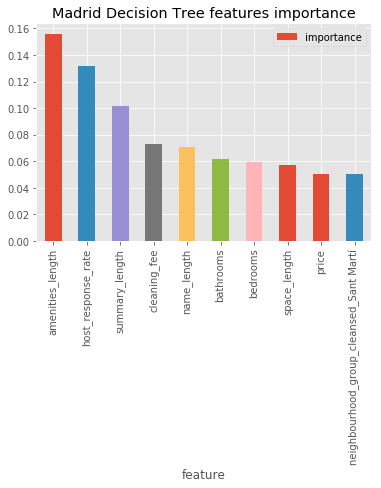

In [68]:
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
dtree = dtree.fit(X_train,y_train)

importances = dtree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',
                                                                   title='Madrid Decision Tree features importance')

In [69]:
dtree_y_predict = dtree.predict(X_test)
dtree_mse = np.sqrt(metrics.mean_squared_error(y_test, dtree_y_predict))
dtree_mse

29.337481342283553

##### Random Forest

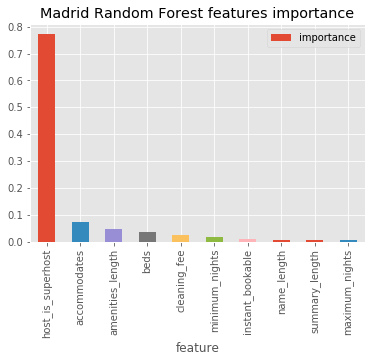

In [70]:
rf = RandomForestRegressor(max_depth=3, random_state=0)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',
                                                                 title='Madrid Random Forest features importance')

In [71]:
rf_y_predict = rf.predict(X_test)
rf_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_y_predict))
rf_mse

9.536085299859783

In [72]:
mean_array = [y_train.mean()] * len(X_test)
mean_mse = np.sqrt(metrics.mean_squared_error(y_test, mean_array))
median_array = [y_train.median()] * len(X_test)
median_mse = np.sqrt(metrics.mean_squared_error(y_test, mean_array))

In [73]:
print("Random Forest MSE:", rf_mse)
print("Decision Tree MSE:", dtree_mse)
print("OLS MSE",ols_mse)
print("Median MSE",median_mse)
print("Mean MSE",mean_mse)

Random Forest MSE: 9.536085299859783
Decision Tree MSE: 29.337481342283553
OLS MSE 9.47074308380423
Median MSE 9.99677641707666
Mean MSE 9.99677641707666


--------------------

Same conclusion as with Madrid. Let's see if triming the predictors gives something new.

--------------------

In [74]:
rf_10_features = rf_result.sort_values(by='importance', ascending=False)['feature'][:10].tolist()
rf_10_features_model = rf.fit(X_train[rf_10_features], y_train)
rf_10_features_model_predict=rf_10_features_model.predict(X_test[rf_10_features])
rf_10_features_model_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_10_features_model_predict))
print(rf_10_features_model_mse)

9.538555395470079


In [75]:
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)
rfe_result = pd.DataFrame({'feature': feat_names, 'ranking': rfe.ranking_, 'selection': rfe.support_})
rfe_result.sort_values(by='ranking')[:10]

,feature,ranking,selection
0,host_response_time,1,True
36,bed_type_Real Bed,1,True
27,property_type_Apartment,1,True
17,neighbourhood_group_cleansed_Ciutat Vella,1,True
9,minimum_nights,1,True
37,cancellation_policy_flexible,1,True
4,bathrooms,1,True
1,host_response_rate,1,True
33,room_type_Private room,1,True
5,bedrooms,1,True


In [76]:
rf_10_features = rfe_result.sort_values(by='ranking')['feature'][:10].tolist()
rf_10_features_model = rf.fit(X_train[rf_10_features], y_train)
rf_10_features_model_predict=rf_10_features_model.predict(X_test[rf_10_features])
rf_10_features_model_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_10_features_model_predict))
print(rf_10_features_model_mse)

9.881967205040052


In [77]:
model = LinearRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)
rfe_result = pd.DataFrame({'feature': feat_names, 'ranking': rfe.ranking_, 'selection': rfe.support_})
rfe_result.sort_values(by='ranking')[:10]

,feature,ranking,selection
42,cancellation_policy_super_strict_60,1,True
1,host_response_rate,1,True
2,host_is_superhost,1,True
38,cancellation_policy_moderate,1,True
34,room_type_Shared room,1,True
5,bedrooms,1,True
33,room_type_Private room,1,True
22,neighbourhood_group_cleansed_Nou Barris,1,True
41,cancellation_policy_super_strict_30,1,True
11,instant_bookable,1,True


In [78]:
rf_10_features = rfe_result.sort_values(by='ranking')['feature'][:10].tolist()
rf_10_features_model = rf.fit(X_train[rf_10_features], y_train)
rf_10_features_model_predict=rf_10_features_model.predict(X_test[rf_10_features])
rf_10_features_model_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_10_features_model_predict))
print(rf_10_features_model_mse)

9.538918918714689


-------------------

Again, no.

-------------------

### Madrid Price Evaluation

--------------------
Let's start by merging the listing and review data.

--------------------

In [79]:
mad_list_price = mad_listings_data[['id', 'price', 'minimum_nights']]
mad_list_price.rename(index=str, columns={"id": "listing_id"},inplace=True)
mad_list_price.head()

C:\Users\danie\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,listing_id,price,minimum_nights
0,19864,$64.00,2
1,21853,$17.00,4
2,24805,$60.00,5
3,24836,$115.00,3
4,26823,$45.00,2


In [80]:
mad_rev_subset = mad_reviews_data[['listing_id','id','date']]
mad_rev_subset.head()

,listing_id,id,date
0,19864,1241716,2012-05-07
1,19864,1261674,2012-05-11
2,19864,1316109,2012-05-21
3,19864,1350402,2012-05-26
4,19864,1496116,2012-06-17


In [81]:
mad_rev_subset = pd.merge(mad_rev_subset, mad_list_price, how='left', on='listing_id')
mad_rev_subset.head()

,listing_id,id,date,price,minimum_nights
0,19864,1241716,2012-05-07,$64.00,2
1,19864,1261674,2012-05-11,$64.00,2
2,19864,1316109,2012-05-21,$64.00,2
3,19864,1350402,2012-05-26,$64.00,2
4,19864,1496116,2012-06-17,$64.00,2


--------------------

Let's now clean and price variable and set the create a estimated revenue for each reviewed stay.

--------------------

In [82]:
mad_rev_subset['price'] = mad_rev_subset['price'].astype(str)
mad_rev_subset['price'] = mad_rev_subset['price'].str.replace('$','')
mad_rev_subset['price'] = mad_rev_subset['price'].str.replace(',','').astype(float)

In [83]:
mad_rev_subset['max_estimated_revenue'] = mad_rev_subset['price'] * mad_rev_subset['minimum_nights']
mad_rev_subset.head()

,listing_id,id,date,price,minimum_nights,max_estimated_revenue
0,19864,1241716,2012-05-07,64.0,2,128.0
1,19864,1261674,2012-05-11,64.0,2,128.0
2,19864,1316109,2012-05-21,64.0,2,128.0
3,19864,1350402,2012-05-26,64.0,2,128.0
4,19864,1496116,2012-06-17,64.0,2,128.0


In [84]:
mad_rev_subset['date'] = pd.to_datetime(mad_rev_subset.date, format='%Y-%m-%d')
mad_rev_subset['year'] = mad_rev_subset['date'].dt.year
mad_rev_subset['month'] = mad_rev_subset['date'].dt.month

--------------------

Now, let's add up the revenues from each stay by month and year.

--------------------

In [85]:
mad_monthly_rev = mad_rev_subset.groupby(['year','month']).agg({'id':'count', 'max_estimated_revenue':'sum', 'price':'mean'})
mad_monthly_rev.rename(index=str, columns={"id": "num_properties", "price": "average_price"},inplace=True)

In [86]:
mad_monthly_rev.head()

num_properties  max_estimated_revenue  average_price
year month                                                      
2010 5                   1                   50.0           25.0
     6                   1                   50.0           25.0
     7                   1                  195.0           65.0
     8                   1                  165.0           55.0
     9                   2                  140.0           35.0

In [87]:
mad_monthly_rev = mad_monthly_rev.reset_index()
mad_monthly_rev['date'] = mad_monthly_rev["year"].map(str) + '-' + mad_monthly_rev["month"]
mad_monthly_rev.head()

,year,month,num_properties,max_estimated_revenue,average_price,date
0,2010,5,1,50.0,25.0,2010-5
1,2010,6,1,50.0,25.0,2010-6
2,2010,7,1,195.0,65.0,2010-7
3,2010,8,1,165.0,55.0,2010-8
4,2010,9,2,140.0,35.0,2010-9


--------------------

Let's see what we have:

--------------------

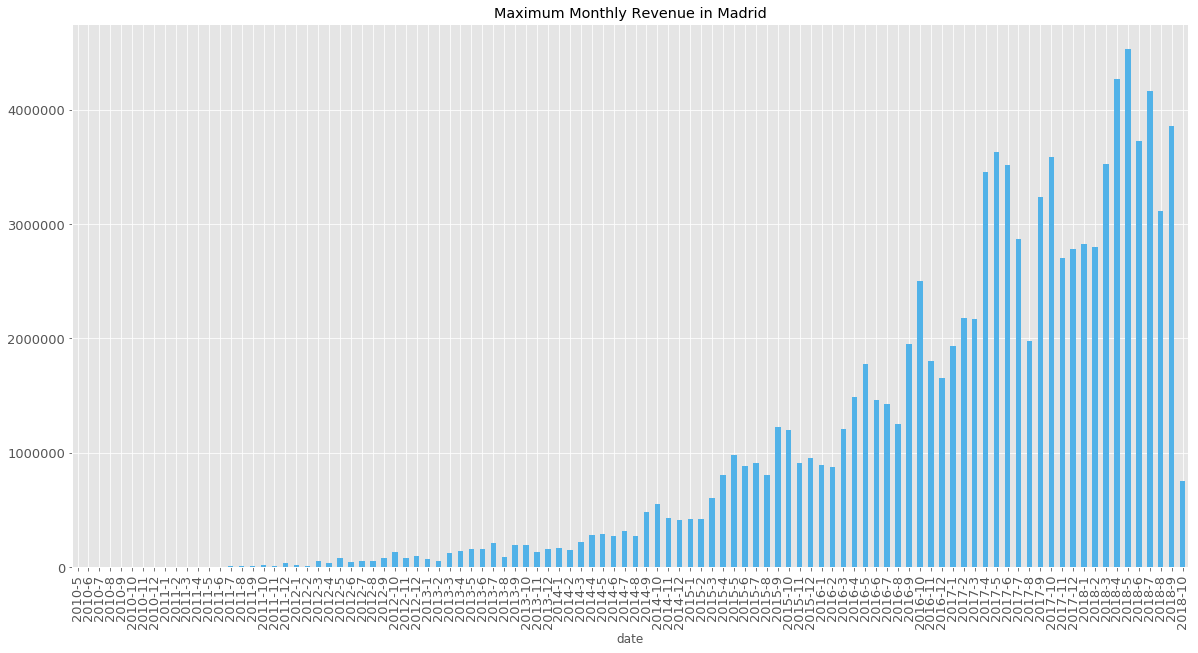

In [88]:
mad_monthly_rev.plot(kind='bar', x='date', y='max_estimated_revenue', figsize=(20,10), color='#51b2e8', fontsize=13, 
                     title="Maximum Monthly Revenue in Madrid", legend=False);

Show only the last five years.

In [89]:
mad_monthly_rev_2013_2018 = mad_monthly_rev[mad_monthly_rev['year'] >= '2013']
mad_monthly_rev_2013_2018.head()

,year,month,num_properties,max_estimated_revenue,average_price,date
32,2013,1,239,75180.0,65.866109,2013-1
33,2013,2,246,55502.0,62.178862,2013-2
34,2013,3,354,119682.0,64.912429,2013-3
35,2013,4,491,142563.0,69.853360,2013-4
36,2013,5,627,162270.0,67.838915,2013-5


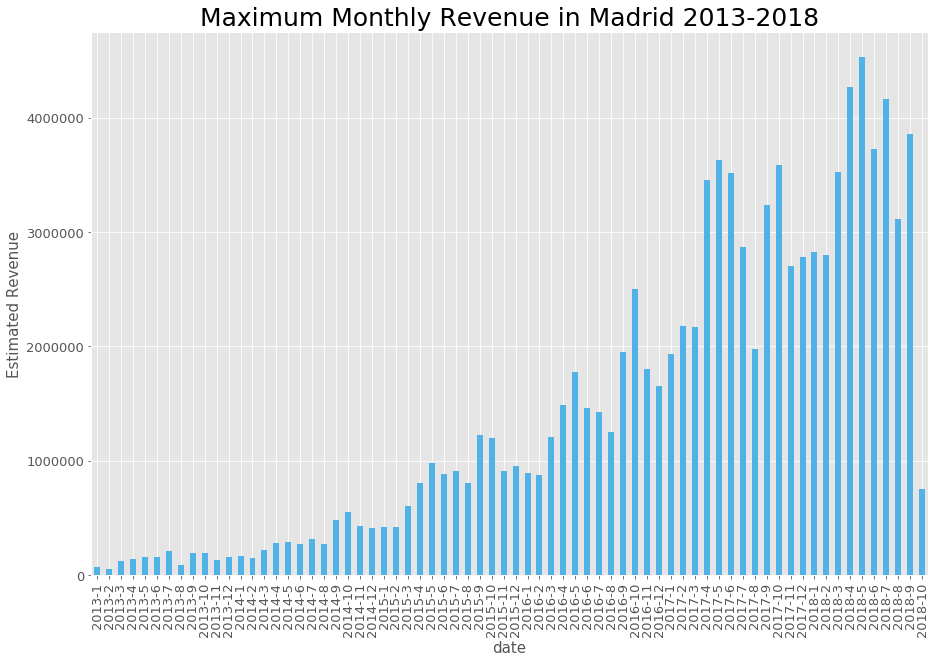

In [90]:
fig, ax = plt.subplots(figsize=(15,10)) 
mad_monthly_rev_2013_2018.plot(kind='bar', x='date', y='max_estimated_revenue',
                               color='#51b2e8', fontsize=13, title="Maximum Monthly Revenue in Madrid 2013-2018", legend=False,
                               ax=ax);
ax.set_ylabel("Estimated Revenue", fontsize=15)
ax.set_xlabel("date", fontsize=15)
ax.title.set_size(25)
fig.savefig('images/max_madrid_revenue.jpg', bbox_inches='tight')

--------------------
Finally, let's calculate the average daily price year to date and the occupancy of the next 6 months.

--------------------

In [91]:
print('The average daily price this year in Madrid is '  + '$' + 
      str(round(mad_monthly_rev_2013_2018['average_price'][-10:].mean(),2)))

The average daily price this year in Madrid is $68.06


In [92]:
mad_availability_next_6_months = mad_calendar_data['available'].value_counts(dropna=False)

In [93]:
mad_current_occupancy_6_months = mad_availability_next_6_months['f']/(mad_availability_next_6_months['f']+
                                                                     mad_availability_next_6_months['t'])
print('Currently, the occupancy for next 6 months in Madrid is ' + (round(mad_current_occupancy_6_months*100,2)).astype(str)+
      '%')

Currently, the occupancy for next 6 months in Madrid is 55.64%


### Barcelona Price Evaluation

--------------------
Again, let's start by merging the listing and review data.

--------------------

In [94]:
bar_list_price = bar_listings_data[['id', 'price', 'minimum_nights']]
bar_list_price.rename(index=str, columns={"id": "listing_id"},inplace=True)
bar_list_price.head()

C:\Users\danie\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,listing_id,price,minimum_nights
0,18666,$130.00,3
1,18674,$320.00,1
2,21605,$33.00,2
3,25786,$31.00,1
4,31377,$42.00,3


In [95]:
bar_rev_subset = bar_reviews_data[['listing_id','id','date']]
bar_rev_subset.head()

,listing_id,id,date
0,18666,50158511,2015-10-10
1,18674,4808211,2013-05-27
2,18674,10660311,2014-03-02
3,18674,41087522,2015-08-04
4,18674,81000756,2016-06-20


In [96]:
bar_rev_subset = pd.merge(bar_rev_subset, bar_list_price, how='left', on='listing_id')
bar_rev_subset.head()

,listing_id,id,date,price,minimum_nights
0,18666,50158511,2015-10-10,$130.00,3
1,18674,4808211,2013-05-27,$320.00,1
2,18674,10660311,2014-03-02,$320.00,1
3,18674,41087522,2015-08-04,$320.00,1
4,18674,81000756,2016-06-20,$320.00,1


--------------------

As before, clean and price variable and set the create a estimated revenue for each reviewed stay.

--------------------

In [97]:
bar_rev_subset['price'] = bar_rev_subset['price'].astype(str)
bar_rev_subset['price'] = bar_rev_subset['price'].str.replace('$','')
bar_rev_subset['price'] = bar_rev_subset['price'].str.replace(',','').astype(float)

In [98]:
bar_rev_subset['max_estimated_revenue'] = bar_rev_subset['price'] * bar_rev_subset['minimum_nights']
bar_rev_subset.head()

,listing_id,id,date,price,minimum_nights,max_estimated_revenue
0,18666,50158511,2015-10-10,130.0,3,390.0
1,18674,4808211,2013-05-27,320.0,1,320.0
2,18674,10660311,2014-03-02,320.0,1,320.0
3,18674,41087522,2015-08-04,320.0,1,320.0
4,18674,81000756,2016-06-20,320.0,1,320.0


In [99]:
bar_rev_subset['date'] = pd.to_datetime(bar_rev_subset.date, format='%Y-%m-%d')
bar_rev_subset['year'] = bar_rev_subset['date'].dt.year
bar_rev_subset['month'] = bar_rev_subset['date'].dt.month

--------------------

Again, add up the revenues from each stay by month and year.

--------------------

In [100]:
bar_monthly_rev = bar_rev_subset.groupby(['year','month']).agg({'id':'count', 'max_estimated_revenue':'sum', 'price':'mean'})
bar_monthly_rev.rename(index=str, columns={"id": "num_properties", "price": "average_price"},inplace=True)

In [101]:
bar_monthly_rev.head()

num_properties  max_estimated_revenue  average_price
year month                                                      
2010 8                   2                  101.0      50.500000
     9                   3                  162.0      54.000000
     10                  3                 4100.0     366.666667
2011 1                   5                11930.0     246.600000
     2                   5                 2119.0     207.800000

In [102]:
bar_monthly_rev = bar_monthly_rev.reset_index()
bar_monthly_rev['date'] = bar_monthly_rev["year"].map(str) + '-' + bar_monthly_rev["month"]
bar_monthly_rev.head()

,year,month,num_properties,max_estimated_revenue,average_price,date
0,2010,8,2,101.0,50.500000,2010-8
1,2010,9,3,162.0,54.000000,2010-9
2,2010,10,3,4100.0,366.666667,2010-10
3,2011,1,5,11930.0,246.600000,2011-1
4,2011,2,5,2119.0,207.800000,2011-2


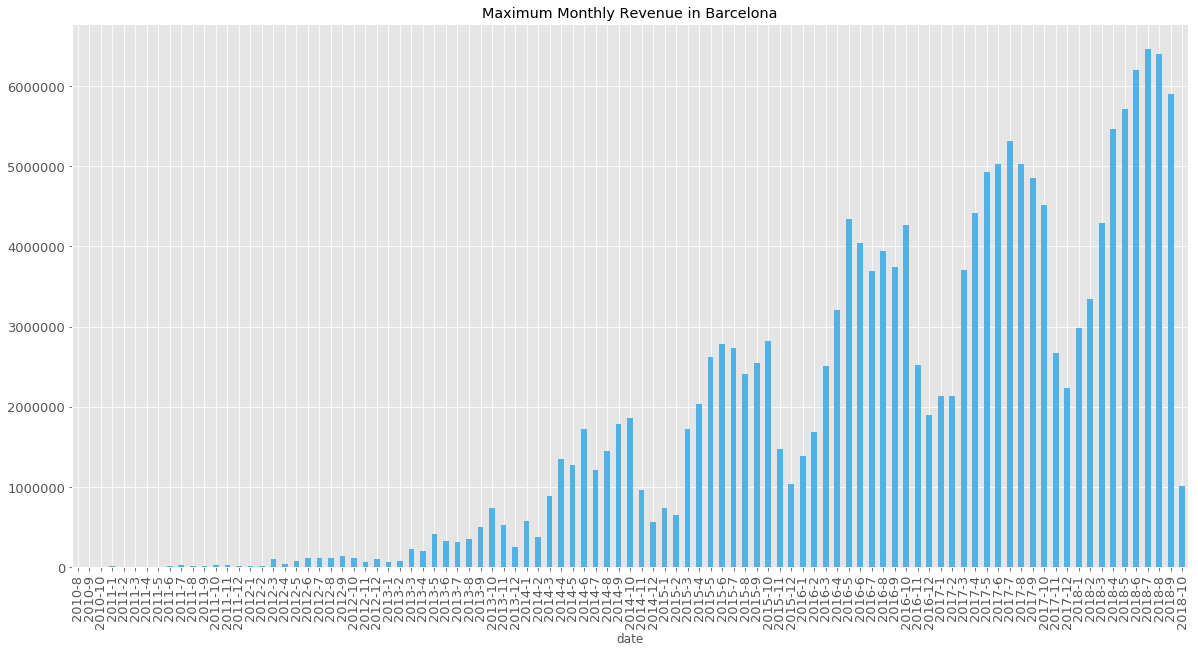

In [103]:
bar_monthly_rev.plot(kind='bar', x='date', y='max_estimated_revenue', figsize=(20,10), color='#51b2e8', fontsize=13, 
                     title="Maximum Monthly Revenue in Barcelona", legend=False);

-------------------

Trimming the last five years.

--------------------

In [104]:
bar_monthly_rev_2013_2018 = bar_monthly_rev[bar_monthly_rev['year'] >= '2013']
bar_monthly_rev_2013_2018.head()

,year,month,num_properties,max_estimated_revenue,average_price,date
27,2013,1,182,69968.0,80.846154,2013-1
28,2013,2,202,75359.0,88.797030,2013-2
29,2013,3,413,228318.0,100.055690,2013-3
30,2013,4,593,204282.0,86.725126,2013-4
31,2013,5,976,408830.0,88.444672,2013-5


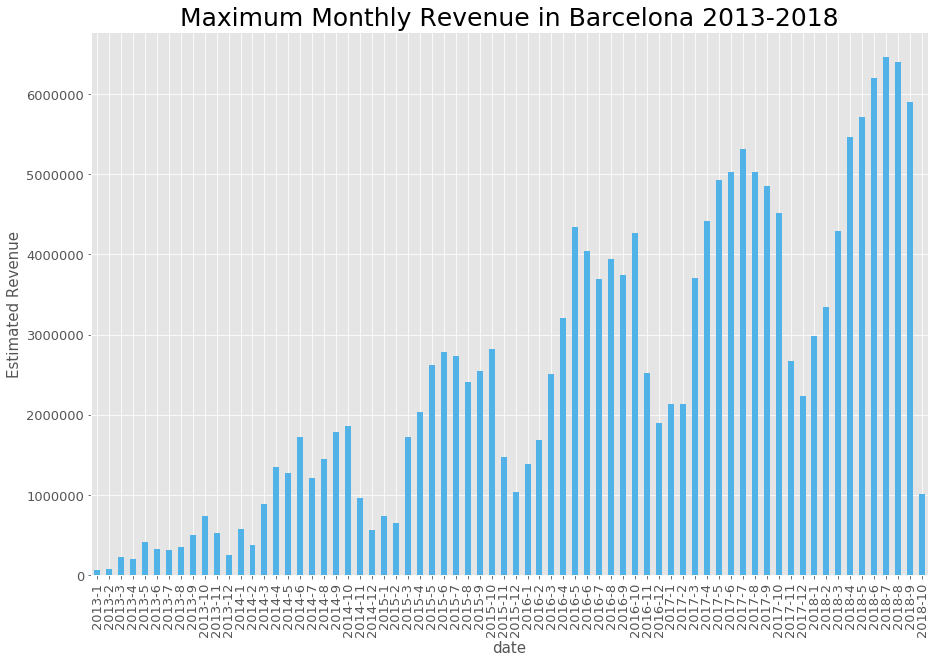

In [105]:
fig, ax = plt.subplots(figsize=(15,10)) 
bar_monthly_rev_2013_2018.plot(kind='bar', x='date', y='max_estimated_revenue',
                               color='#51b2e8', fontsize=13, title="Maximum Monthly Revenue in Barcelona 2013-2018", 
                               legend=False, ax=ax);
ax.set_ylabel("Estimated Revenue", fontsize=15)
ax.set_xlabel("date", fontsize=15)
ax.title.set_size(25)
fig.savefig('images/max_barcelona_revenue.jpg', bbox_inches='tight')

--------------------
And the average daily price year to date and the occupancy of the next 6 months.

--------------------

In [106]:
print('The average daily price this year in barrid is '  + '$' + 
      str(round(bar_monthly_rev_2013_2018['average_price'][-10:].mean(),2)))

The average daily price this year in barrid is $92.27


In [107]:
bar_availability_next_6_months = bar_calendar_data['available'].value_counts(dropna=False)

In [108]:
bar_current_occupancy_6_months = bar_availability_next_6_months['f']/(bar_availability_next_6_months['f']+
                                                                     bar_availability_next_6_months['t'])
print('Currently, the occupancy for next 6 months in Barcelona is ' + (round(bar_current_occupancy_6_months*100,2)).astype(str)+
      '%')

Currently, the occupancy for next 6 months in Barcelona is 48.43%
